In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For handling categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# For feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For handling datetime if applicable
from datetime import datetime
%matplotlib inline
# Setting seaborn style for better aesthetics
sns.set(style='whitegrid', palette='muted', font_scale=1.2)




In [12]:
# Define the path to the development data
dev_data_path = '/home/harsh/Hackathons/Convolve/data/dev/Dev_data_to_be_shared.csv'  # Update this path as necessary

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv(dev_data_path)
    print(f"Development data loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found at {dev_data_path}. Please check the path and try again.")


Development data loaded successfully with shape: (96806, 1216)


In [13]:
# Display first few rows
df.head()


,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Calculate the percentage of missing values per column
missing_values = df.isnull().mean().sort_values(ascending=False) * 100
missing_values = missing_values[missing_values > 0]

print(f"Columns with Missing Values:\n{missing_values}")






Columns with Missing Values:
bureau_436           100.000000
bureau_447           100.000000
bureau_449            94.124331
bureau_148            93.552053
bureau_448            90.028511
                        ...    
bureau_199             1.232362
onus_attribute_5       0.002066
onus_attribute_10      0.002066
onus_attribute_13      0.002066
onus_attribute_16      0.002066
Length: 1185, dtype: float64


In [15]:
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64>

In [16]:
# Count the number of missing values in each column
col_missing_counts = df.isnull().sum()

# Display the distribution of missing values across columns
print("Column-wise missing value counts:")
print(col_missing_counts)

# Identify columns with missing values greater than 30,000
columns_to_drop = col_missing_counts[col_missing_counts > 30000].index

# Print columns to drop
print(f"Columns with missing values > 30,000:\n{columns_to_drop}")

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print results
print(f"Number of columns dropped: {len(columns_to_drop)}")
print(f"Updated DataFrame shape: {df.shape}")


Column-wise missing value counts:
account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64
Columns with missing values > 30,000:
Index(['bureau_147', 'bureau_148', 'bureau_433', 'bureau_434', 'bureau_435',
       'bureau_436', 'bureau_437', 'bureau_438', 'bureau_440', 'bureau_444',
       'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449',
       'bureau_451', 'onus_attribute_6', 'onus_attribute_7',
       'onus_attribute_9', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object')
Number of columns dropped: 25
Updated DataFrame shape: (

In [17]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Select numerical columns, excluding the target variable
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('bad_flag')  # Exclude target variable

# Check for missing columns due to imputation issues
imputer_num = SimpleImputer(strategy='median')
imputed_data = imputer_num.fit_transform(df[numerical_cols])

# Verify column shape after imputation
if imputed_data.shape[1] != len(numerical_cols):
    print("Mismatch detected! Rechecking columns...")
    original_cols = set(numerical_cols)
    imputed_cols = set(df[numerical_cols].columns)
    missing_cols = original_cols - imputed_cols
    print(f"Columns dropped during imputation: {missing_cols}")

# Assign imputed values back to the DataFrame
df[numerical_cols] = pd.DataFrame(
    imputed_data,
    columns=numerical_cols[:imputed_data.shape[1]],  # Handle column alignment
    index=df.index
)

# Final missing value check
print(f"Missing values after imputation:\n{df.isnull().sum().sum()}")


Missing values after imputation:
0


In [18]:
# Identify categorical columns (assuming object type)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove the target variable if present
if 'bad_flag' in categorical_cols:
    categorical_cols.remove('bad_flag')

# Option 1: Label Encoding for binary categorical variables
# Option 2: One-Hot Encoding for multi-category variables

# Example: Label Encoding for binary categories
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Example: One-Hot Encoding for multi-category variables
multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print(f"Data shape after encoding: {df.shape}")


Data shape after encoding: (96806, 1191)


In [19]:

# Outlier capping for dev_data
def cap_outliers(df, col, lower_q=0.01, upper_q=0.99):
    lower_val = df[col].quantile(lower_q)
    upper_val = df[col].quantile(upper_q)
    df[col] = np.clip(df[col], lower_val, upper_val)

for c in numerical_cols:
    cap_outliers(df, c)

In [20]:
all_cols_dev = df.columns.tolist()

onus_cols = [c for c in all_cols_dev if c.startswith('onus_attributes_')]
txn_cols = [c for c in all_cols_dev if c.startswith('transaction_attribute_')]
bureau_cols = [c for c in all_cols_dev if c.startswith('bureau_') and not c.startswith('bureau_enquiry_')]
bureau_enquiry_cols = [c for c in all_cols_dev if c.startswith('bureau_enquiry_')]

print("On-us attribute columns:", onus_cols)
print("Transaction attribute columns:", txn_cols)
print("Bureau attribute columns:", bureau_cols)
print("Bureau enquiry columns:", bureau_enquiry_cols)

On-us attribute columns: []
Transaction attribute columns: ['transaction_attribute_1', 'transaction_attribute_2', 'transaction_attribute_3', 'transaction_attribute_4', 'transaction_attribute_5', 'transaction_attribute_6', 'transaction_attribute_7', 'transaction_attribute_8', 'transaction_attribute_9', 'transaction_attribute_10', 'transaction_attribute_11', 'transaction_attribute_12', 'transaction_attribute_13', 'transaction_attribute_14', 'transaction_attribute_15', 'transaction_attribute_16', 'transaction_attribute_17', 'transaction_attribute_18', 'transaction_attribute_19', 'transaction_attribute_20', 'transaction_attribute_21', 'transaction_attribute_22', 'transaction_attribute_23', 'transaction_attribute_24', 'transaction_attribute_25', 'transaction_attribute_26', 'transaction_attribute_27', 'transaction_attribute_28', 'transaction_attribute_29', 'transaction_attribute_30', 'transaction_attribute_31', 'transaction_attribute_32', 'transaction_attribute_33', 'transaction_attribute_34

In [21]:
def aggregate_prefix_columns(df, prefix_cols, prefix_name):
    """
    Aggregates the columns belonging to a certain prefix.
    Example aggregations: sum, mean, max, min.
    Returns a DataFrame of new aggregated features.
    """
    if not prefix_cols:
        return pd.DataFrame(index=df.index)  # empty if no columns match

    subset = df[prefix_cols].astype(float)  # ensure numeric
    agg_dict = {
        'sum': subset.sum(axis=1),
        'mean': subset.mean(axis=1),
        'max': subset.max(axis=1),
        'min': subset.min(axis=1),
    }
    agg_df = pd.DataFrame(agg_dict)
    agg_df.columns = [f'{prefix_name}_{agg_col}' for agg_col in agg_df.columns]

    return agg_df


def create_prefix_features_dev(df, onus_cols, txn_cols, bureau_cols, bureau_enquiry_cols):
    """Create aggregated features for dev_data based on column prefixes."""
    onus_agg = aggregate_prefix_columns(df, onus_cols, 'onus')
    txn_agg = aggregate_prefix_columns(df, txn_cols, 'txn')
    bureau_agg = aggregate_prefix_columns(df, bureau_cols, 'bureau')
    bureau_enquiry_agg = aggregate_prefix_columns(df, bureau_enquiry_cols, 'bureau_enquiry')

    # Combine them horizontally
    all_agg = pd.concat([onus_agg, txn_agg, bureau_agg, bureau_enquiry_agg], axis=1)

    # Concatenate with original dev_data
    df = pd.concat([df, all_agg], axis=1)
    return df

# Apply only to dev_data
df = create_prefix_features_dev(df, onus_cols, txn_cols, bureau_cols, bureau_enquiry_cols)
print("Shape of dev_data after prefix-based feature creation:", df.shape)


Shape of dev_data after prefix-based feature creation: (96806, 1203)


In [22]:
def create_cross_prefix_features_dev(df):
    # Safely check if these columns exist
    if 'onus_sum' in df.columns and 'txn_sum' in df.columns:
        df['feat_ratio_txn_onus_sum'] = np.where(
            df['onus_sum'] == 0, 0,
            df['txn_sum'] / (df['onus_sum'] + 1e-9)
        )

    if 'bureau_mean' in df.columns and 'bureau_enquiry_mean' in df.columns:
        df['feat_diff_bureau_vs_enquiry_mean'] = df['bureau_mean'] - df['bureau_enquiry_mean']

    if 'bureau_sum' in df.columns and 'bureau_enquiry_sum' in df.columns:
        df['feat_ratio_bureau_enquiry_sum'] = np.where(
            df['bureau_enquiry_sum'] == 0, 0,
            df['bureau_sum'] / (df['bureau_enquiry_sum'] + 1e-9)
        )

    # Add more cross-prefix logic if desired
    return df


In [23]:
def apply_log_transform_dev(df):
    log_cols = [c for c in df.columns if any(x in c for x in ['_sum','_mean','_max']) and df[c].dtype in [np.float64, np.int64]]

    for col in log_cols:
        # Because some columns could be zero or negative, we do np.log1p(col) => log(col+1)
        df[f'log_{col}'] = np.log1p(df[col].clip(lower=0))  # ensure we don't log negative
    return df


In [24]:
def apply_binning_dev(df):
    if 'txn_sum' in df.columns:
        # Example: cut txn_sum into quartiles
        df['bin_txn_sum_quartile'] = pd.qcut(df['txn_sum'], q=4, labels=False, duplicates='drop')
        # This creates 4 bins labeled 0,1,2,3 representing quartiles
    return df


In [25]:

# 2) Cross-Prefix Interactions
df = create_cross_prefix_features_dev(df)

# 3) Log Transform
df = apply_log_transform_dev(df)

# 4) Binning
df = apply_binning_dev(df)

print("Shape of df after advanced feature engineering:", df.shape)


Shape of df after advanced feature engineering: (96806, 1217)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define target column and features
identifier_cols = ['account_number']
target_col = 'bad_flag'
features = df.drop(columns=[target_col] + identifier_cols, errors='ignore')
target = df[target_col]



In [27]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# features, target = rus.fit_resample(features, target)


In [28]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# features, target = ros.fit_resample(features, target)


In [29]:
# from imblearn.over_sampling import SMOTE


# smote = SMOTE(random_state=42)
# features, target = smote.fit_resample(features, target)


In [30]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import (
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     mean_absolute_error
# )





# # Initialize a base Random Forest model
# rf_model = RandomForestClassifier(
#     random_state=42,
#     n_estimators=100,
#     n_jobs=-1,
#     class_weight="balanced"
# )

# # Train the model
# rf_model.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred = rf_model.predict(X_test_scaled)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# # Calculate Mean Absolute Error
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Absolute Error: {mae:.2f}")


In [31]:
# print(f"shape of x_train is :",X_train.shape)
# print(f"shape of x_test is :",X_test.shape)
# print(f"shape of y_train is :",y_train.shape)
# print(f"shape of y_test is :",y_test.shape)

In [32]:
# feature_importances = pd.DataFrame({
#     'Feature': features.columns,
#     'Importance': rf_model.feature_importances_
# }).sort_values(by='Importance', ascending=False)
# print(feature_importances)


In [33]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()


In [34]:
# target_col = 'bad_flag'
# correlations = df.corr()[target_col].abs().sort_values(ascending=False)

# # Drop the target column from this series (so we don't re-select the target itself)
# correlations = correlations.drop(labels=[target_col], errors='ignore')

# # Select the top 50 columns
# top_50_cols = correlations.index[:50].tolist()

# print("Top 50 correlated features with the target:\n", top_50_cols)


In [35]:
# top_50_df = df[top_50_cols]

# # Generate the correlation matrix
# corr_matrix = top_50_df.corr()

# # Display correlation matrix
# print("Correlation matrix of the top 50 correlated features:")
# print(corr_matrix)


In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(120, 100))
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
# plt.title("Correlation Matrix of Top 50 Features")
# plt.show()


scale_pos_weight: 69.95706806282722


/home/harsh/Hackathons/Convolve/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost Results =====
AUC-ROC: 0.8076111547443268
MAE: 29.2110168177447

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     28625
           1       0.04      0.67      0.08       417

    accuracy                           0.79     29042
   macro avg       0.52      0.73      0.48     29042
weighted avg       0.98      0.79      0.87     29042



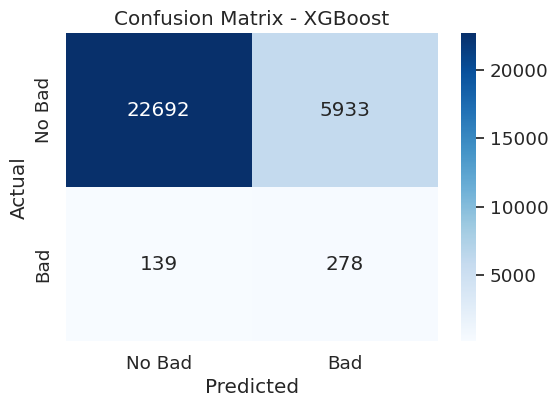


===== CatBoost Results =====
AUC-ROC: 0.8088923795461448
MAE: 33.851356806291086

Classification Report (CatBoost):
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     28625
           1       0.04      0.73      0.08       417

    accuracy                           0.75     29042
   macro avg       0.52      0.74      0.46     29042
weighted avg       0.98      0.75      0.84     29042



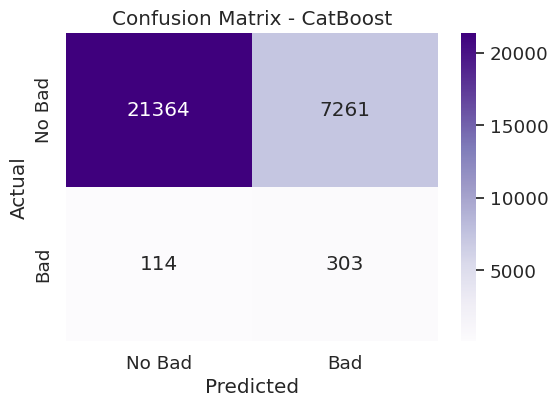

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# XGBoost
from xgboost import XGBClassifier

# CatBoost
from catboost import CatBoostClassifier

# LightGBM
from lightgbm import LGBMClassifier

# For saving models
from joblib import dump


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.3,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance (for demonstration)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight:", scale_pos_weight)

###############################################################################
# 2. XGBoost
###############################################################################
best_params_xgb = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'reg_alpha': 0,
    'reg_lambda': 10,
    'subsample': 1.0
}

model_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42,
    **best_params_xgb
)

model_xgb.fit(X_train_scaled, y_train)

# Predict probabilities and labels on the validation set
y_val_pred_prob_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
y_val_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate
auc_xgb = roc_auc_score(y_test, y_val_pred_prob_xgb)
mae_xgb = mean_absolute_error(y_test, y_val_pred_prob_xgb) * 100

print("===== XGBoost Results =====")
print(f"AUC-ROC: {auc_xgb}")
print(f"MAE: {mae_xgb}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_val_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_val_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Bad", "Bad"], yticklabels=["No Bad", "Bad"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###############################################################################
# 3. CatBoost
###############################################################################
# You could do parameter tuning similarly. Here, let's define some example params:
best_params_cat = {
    'iterations': 100,
    'depth': 4,
    'learning_rate': 0.1,
    'random_seed': 42,
    'l2_leaf_reg': 3,
    'thread_count': -1,
    'eval_metric': 'AUC'
}

model_cat = CatBoostClassifier(
    **best_params_cat,
    class_weights=[1, scale_pos_weight]
)

model_cat.fit(
    X_train_scaled,
    y_train,
    eval_set=(X_test_scaled, y_test),
    verbose=False  # set True if you want iteration logs
)

y_val_pred_prob_cat = model_cat.predict_proba(X_test_scaled)[:, 1]
y_val_pred_cat = model_cat.predict(X_test_scaled)


auc_cat = roc_auc_score(y_test, y_val_pred_prob_cat)
mae_cat = mean_absolute_error(y_test, y_val_pred_prob_cat) * 100

print("\n===== CatBoost Results =====")
print(f"AUC-ROC: {auc_cat}")
print(f"MAE: {mae_cat}")
print("\nClassification Report (CatBoost):")
print(classification_report(y_test, y_val_pred_cat))

conf_matrix_cat = confusion_matrix(y_test, y_val_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cat, annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Bad", "Bad"], yticklabels=["No Bad", "Bad"])
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


###############################################################################
# 5. (Optional) Model Saving
###############################################################################
# For example, save CatBoost model
# model_cat.save_model("catboost_model.cbm")
# For XGBoost
# dump(model_xgb, "xgb_model.joblib")
# For LightGBM
# dump(model_lgb, "lgb_model.joblib")

